# Embedding space

This document will explore the training and analysis of our embedding space.

In [1]:
%pip install scipy==1.10.0
%pip install gensim
%pip install numpy
%pip install pandas
%pip install scikit-learn
%pip install matplotlib
%pip install pacmap

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import csv
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pacmap
import json
from collections import defaultdict
import re


In [3]:
with open('../Data/sequences.csv', 'r') as f:
    reader = csv.reader(f)
    sequences = list(reader)

# First model

In [ ]:
model = Word2Vec(sentences=sequences,   # This is the data that we wish to create notes on. This will take all unique words (stations) and put them in the NN
                 vector_size=300,       # Amount of dimension
                 min_count=10,          # If the number of occurences of this station is less than 10, then we are not interested in having it in our embedding. -- THIS NEED TO BE LOOKED AT
                 workers=4              # Amount of cores used for training and so forth.
                 )         

model.build_vocab(sequences)
model.train(sequences, total_examples=model.corpus_count, epochs=1)


In [ ]:
model.wv.vectors

# Vanløse test case

In [ ]:

from collections import Counter

# Initialize a Counter to store station counts
station_counter = Counter()
list_of_stations_with_vanløse = []

# Iterate over each journey list
for journey in sequences:
    # Check if 'Vanløse St.' is present in the journey
    if 'Vanløse St.' in journey:
        # Iterate over each station in the journey
        for station in journey:
            # Exclude 'Vanløse St.' from counting
            if station != 'Vanløse St.':
                # Increment the count for the station
                station_counter[station] += 1

# Sort the station counts by count (descending order)
sorted_stations = sorted(station_counter.items(), key=lambda x: x[1], reverse=True)
for sta in sorted_stations:
    if sta[1] > 7:
        list_of_stations_with_vanløse.append(sta[0])

# Print the station counts
for station, count in sorted_stations:
    print(f"{station}: {count}")


In [ ]:
list_of_stations_with_vanløse

In [ ]:
from matplotlib import pyplot as plt


def tsne_plot(model):
    "Create TSNE model and plot it"
    labels = []
    tokens = []

    for word in model.wv.index_to_key:
        tokens.append(model.wv[word])
        if(word) in list_of_stations_with_vanløse:
            labels.append(word)
        else:
            labels.append(None)
       
    tsne_model = TSNE(perplexity=5, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(np.array(tokens))

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(18, 18)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        
        plt.annotate(labels[i],
                    xy=(x[i], y[i]),
                    xytext=(5, 2),
                    textcoords='offset points',
                    ha='right',
                    va='bottom')
    plt.show()
   
tsne_plot(model)

# København H (Metro) Test

In [ ]:

from collections import Counter

# Initialize a Counter to store station counts
station_counter_kbh_metro = Counter()
list_of_stations_with_kbh_metro = []

# Iterate over each journey list
for journey in sequences:
    if 'København H (Metro)' in journey:
        # Iterate over each station in the journey
        for station in journey:
            if station != 'København H (Metro)':
                station_counter_kbh_metro[station] += 1

# Sort the station counts by count (descending order)
sorted_stations_kbh = sorted(station_counter_kbh_metro.items(), key=lambda x: x[1], reverse=True)
for sta in sorted_stations_kbh:
    if sta[1] > 7:
        list_of_stations_with_kbh_metro.append(sta[0])

# Print the station counts
for station, count in sorted_stations_kbh:
    print(f"{station}: {count}")


In [ ]:
list_of_stations_with_kbh_metro

In [ ]:
def tsne_plot(model):
    "Create TSNE model and plot it"
    labels = []
    tokens = []

    for word in model.wv.index_to_key:
        tokens.append(model.wv[word])
        if(word) in list_of_stations_with_kbh_metro:
            labels.append(word)
        else:
            labels.append(None)
       
    tsne_model = TSNE(perplexity=5, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(np.array(tokens))

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(18, 18)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        
        plt.annotate(labels[i],
                    xy=(x[i], y[i]),
                    xytext=(5, 2),
                    textcoords='offset points',
                    ha='right',
                    va='bottom')
    plt.show()
   
tsne_plot(model)

# General

Reference: ```https://towardsdatascience.com/visualizing-your-embeddings-4c79332581a9```
#### Embedding space

***Mathematical intuition***: Given two points Xi, Xj, the farther they are, the higher their distance dj|i, the higher their dissimilarity, and the lower the probability that they will consider each other neighbors.

***Key concept***: the further away two embeddings are in the space, the more dissimilar they are.

#### Perplexity
***Mathematical intuition***: The higher the perplexity, the more likely it is to consider points that are far away as neighbors.

***Advice***: The authors of SNE and t-SNE (yes, t-SNE has perplexity as well) use perplexity values between five and 50.

In [ ]:
def tsne_plot(model):
    "Create TSNE model and plot it"
    labels = []
    tokens = []

    for word in model_new.wv.index_to_key:
        tokens.append(model_new.wv[word])
        if(word) in list_of_stations_with_kbh_metro:
            labels.append(word)
        else:
            labels.append(None)
       
    tsne_model = TSNE(perplexity=50, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(np.array(tokens))

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(18, 18)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        
        plt.annotate(labels[i],
                    xy=(x[i], y[i]),
                    xytext=(5, 2),
                    textcoords='offset points',
                    ha='right',
                    va='bottom')
    plt.show()
   
tsne_plot(model_new)

# Visualizing with model of all journeys cph trained 5000 times

In [41]:
model_5000 = Word2Vec.load("../Data/Models/word2vec_epoch_5000.model")
model_200 = Word2Vec.load("../Data/Models/word2vec_epoch_200_min_1.model")
model_1000 = Word2Vec.load("../Data/Models/word2vec_epoch_1000_min_1.model")
model_3000 = Word2Vec.load("../Data/Models/word2vec_epoch_3000_min_1.model")

# T-SNE plot first

# Testing using PaCMAP


In [ ]:
%pip install pacmap

In [ ]:
def tsne_plot(model):
    "Create TSNE model and plot it"
    labels = []
    tokens = []

    for word in model.wv.index_to_key:
        tokens.append(model.wv[word])
        #labels.append(word)
       
    tsne_model = TSNE(perplexity=50, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(np.array(tokens))

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(18, 18)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        
        # plt.annotate(labels[i],
        #             xy=(x[i], y[i]),
        #             xytext=(5, 2),
        #             textcoords='offset points',
        #             ha='right',
        #             va='bottom')
    plt.show()
   
tsne_plot(model_all)

## paCMAP

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pacmap

# Assuming model_new is your Word2Vec model
station_names = model_all.wv.index_to_key

# Generate labels based on whether "metro" is in the station name
labels = []
for station_name in station_names:
    if "metro" in station_name.lower():
        labels.append("Metro")
    else:
        labels.append("Non-Metro")

# Convert labels to numerical format
label_encoder = LabelEncoder()
label_encoder.fit(labels)
numeric_labels = label_encoder.transform(labels)

# Convert Word2Vec vectors to numpy array
X = model_all.wv.vectors

# Initializing the PaCMAP instance
embedding = pacmap.PaCMAP(n_components=2, n_neighbors=None, MN_ratio=0.5, FP_ratio=2.0) 

# Fit the data
X_transformed = embedding.fit_transform(X, init="pca")

# Visualize the embedding with different colors for "Metro" and "Non-Metro" stations
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
scatter = ax.scatter(X_transformed[:, 0], X_transformed[:, 1], c=numeric_labels, cmap='coolwarm', s=0.6)
plt.colorbar(scatter, ax=ax)

plt.show()


## T-SNE

In [ ]:
def tsne_plot(model):
    "Create TSNE model and plot it"
    labels = []
    tokens = []

    for word in model.wv.index_to_key:
        tokens.append(model.wv[word])
        #labels.append(word)
       
    tsne_model = TSNE(perplexity=50, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(np.array(tokens))

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(18, 18)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        
        # plt.annotate(labels[i],
        #             xy=(x[i], y[i]),
        #             xytext=(5, 2),
        #             textcoords='offset points',
        #             ha='right',
        #             va='bottom')
    plt.show()
   
tsne_plot(model_all)

# New model

Trying set min-count to 1, because we have more than 15.000 sequences where one of the stations is mentioned under 10 times in total. 

In [35]:
model = Word2Vec(sentences=sequences,   # This is the data that we wish to create notes on. This will take all unique words (stations) and put them in the NN
                 vector_size=300,       # Amount of dimension
                 min_count=1,          
                 workers=4              # Amount of cores used for training and so forth.
                 )         

model.build_vocab(sequences)
model.train(sequences, total_examples=model.corpus_count, epochs=3000)

(11464244234, 20815842000)

In [37]:
model.save("word2vec_epoch_3000_min_1.model")


In [6]:
f = open('../Data/data.json')
data = json.load(f)

#### Prep for labels zipcodes

In [16]:
#retrieve zipcode
def getZip(info):
    pattern = '\d{4}'
    match = re.search(pattern, info)
    if match is not None:
        return match.group()
    else :
        return

# # Extract zip codes and corresponding coordinates
#zip_coordinates = defaultdict(list)
address_coordinates = {}
# we have some json objects where the address exists but the info is null. This happens in 1602 cases (assume this is where the geolocator failed)
for address, info in data.items():
    if info is not None: 
        zip_code = getZip(info['address'])  # Extract zip code from address could be empty
        if zip_code is not None:
            if 1000 <= int(zip_code) < 4999: #for now removing all failed zipcodes in Jylland
                 #zip_coordinates[zip_code].append((address,info["latitude"], info["longitude"]))
                 address_coordinates[address] = zip_code
            else: 
                address_coordinates[address] = 0000 #the zipcode is not on Sjælland
        else:
            address_coordinates[address] = 0000 #no zipcode was found
    else:
        address_coordinates[address] = 0000 #no info was found on the address?


for address, zip_code in address_coordinates.items():
    print(address)
    print(zip_code)
    print()

print(len(address_coordinates))

Otto Mallings Gade 8
2100

Borgbjergsvej 56
2450

Nørre Farimagsgade 64A
1364

Nyrnberggade 38
2300

Dag Hammarskjölds Allé 32
2100

Vigerslev Allé 71
2500

Arkonagade 19
1726

Lyongade 9
2300

Bachersmindevej 5B
2791

Thingvalla Allé 25
2300

Ungarnsgade 4
2300

Maglestien 20
2860

Strandvejen
0

Bag Elefanterne 15
1799

Alsgade 8
1764

Tomsgårdsvej 23C
2400

Wilkensvej 8
2000

Tåsingegade 20
2100

Kastrupvej 1
0

Korsgade 38
2200

Belfastvej 13B
2300

Alliancevej
2450

Kyringevej 1
2700

Hvidkildevej 36B
2400

Gammel Køge Landevej 132
2500

Nørrebrogade 210
2200

Linde Alle
0

Amagerbrogade 289
2300

Leiden Alle 15
2791

Blegdamsvej 132A
2100

Langelandsvej 10A
2000

Burmeistersgade 1C
1429

Bryggernes Plads 9A
1799

Scandiagade 58
2450

Halmtorvet 29E
1700

Helsinkigade 5
2150

Gåsebæksvej 12
2500

Nadine Gordimers Vej 11
2300

Baggesensgade 39
2200

Pilegård Alle 3
2770

I C Lembrechts Alle 13
2650

Ingrid Marievej 1
2500

Tilburg Alle 46
2791

Rugvej 5
0

Kastrupvej 102
4370

Raff

#### Prep for labels count

in 1602 cases for the json file the info is null

In [17]:
address_count_seq = {}
for seq in sequences:
    for place in seq:
        if place in address_count_seq:
            address_count_seq[place] += 1
        else:
            address_count_seq[place] = 1

address_count_seq

{'København H': 561105,
 'Borrebyvej 29': 2,
 'Hulgårds Plads': 6721,
 'Islands Brygge St. (Metro)': 68363,
 'København H (Metro)': 115016,
 'Frederiksberg Allé St. (Metro)': 40895,
 'Nørreport St.': 342289,
 'Sluseholmen': 8055,
 'Lufthavnen St. (Metro)': 37354,
 'Aksel Møllers Have St. (Metro)': 17669,
 'CPH Lufthavn': 360454,
 'Istedgade 6': 77,
 'Ryumgårdsvej': 413,
 'Dybbølsbro St.': 62202,
 'Teglgårdstræde': 6498,
 'Kapelvej': 18689,
 'Forum St. (Metro)': 69195,
 'Drechselsgade': 4402,
 'Nyhavn': 79750,
 'Refshaleøen': 189228,
 'Nørre Campus': 4827,
 'Dronningens Tværgade 37': 5,
 'Elmegade': 41246,
 'Værnedamsvej': 6845,
 'Skellet': 297,
 'Vestamager St. (Metro)': 77945,
 'Fisketorvet': 16649,
 'Sjælør St.': 9632,
 'Østerport St.': 75800,
 'Orientkaj St.': 20295,
 'Sønderport': 7334,
 'Rådhuspladsen St. (Metro)': 63028,
 'Vesterport St.': 49705,
 'Nordhavn St.': 66577,
 'Terminalvej': 276,
 'Hellerup St.': 36758,
 'Polititorvet': 42351,
 'Amager Boulevard': 2745,
 'Nordre Toldbo

## Plotting

Now that we have a dictionary mapping all addresses to their zipcode, we want to try to plot this using the different dimension reduction algorithms

Count the number of objects in the json file to see why we only have 34815
If the last section works, the below can be deleted

# FUNCTION TO CREATE PLOTS

In [38]:
def create_plot(input_model, label_function, name_of_plot):
    #get station names from the model
    model = input_model
    station_names = model.wv.index_to_key

    # Generate labels based on labels function
    labels = label_function([], station_names)
    
    # Convert labels to numerical format
    label_encoder = LabelEncoder()
    label_encoder.fit(labels)
    numeric_labels = label_encoder.transform(labels)

    # Convert Word2Vec vectors to numpy array
    X = model.wv.vectors

    # Initializing the PaCMAP instance
    embedding = pacmap.PaCMAP(n_components=2, n_neighbors=None, MN_ratio=0.5, FP_ratio=2.0) 

    # Fit the data
    X_transformed = embedding.fit_transform(X, init="pca")

    fig, ax = plt.subplots(1, 1, figsize=(20, 20))
    scatter = ax.scatter(X_transformed[:, 0], X_transformed[:, 1], c=numeric_labels, cmap='coolwarm', s=0.6)
    plt.colorbar(scatter, ax=ax)
    plt.savefig(name_of_plot)
    plt.show()



## ZIPCODES PLOTS

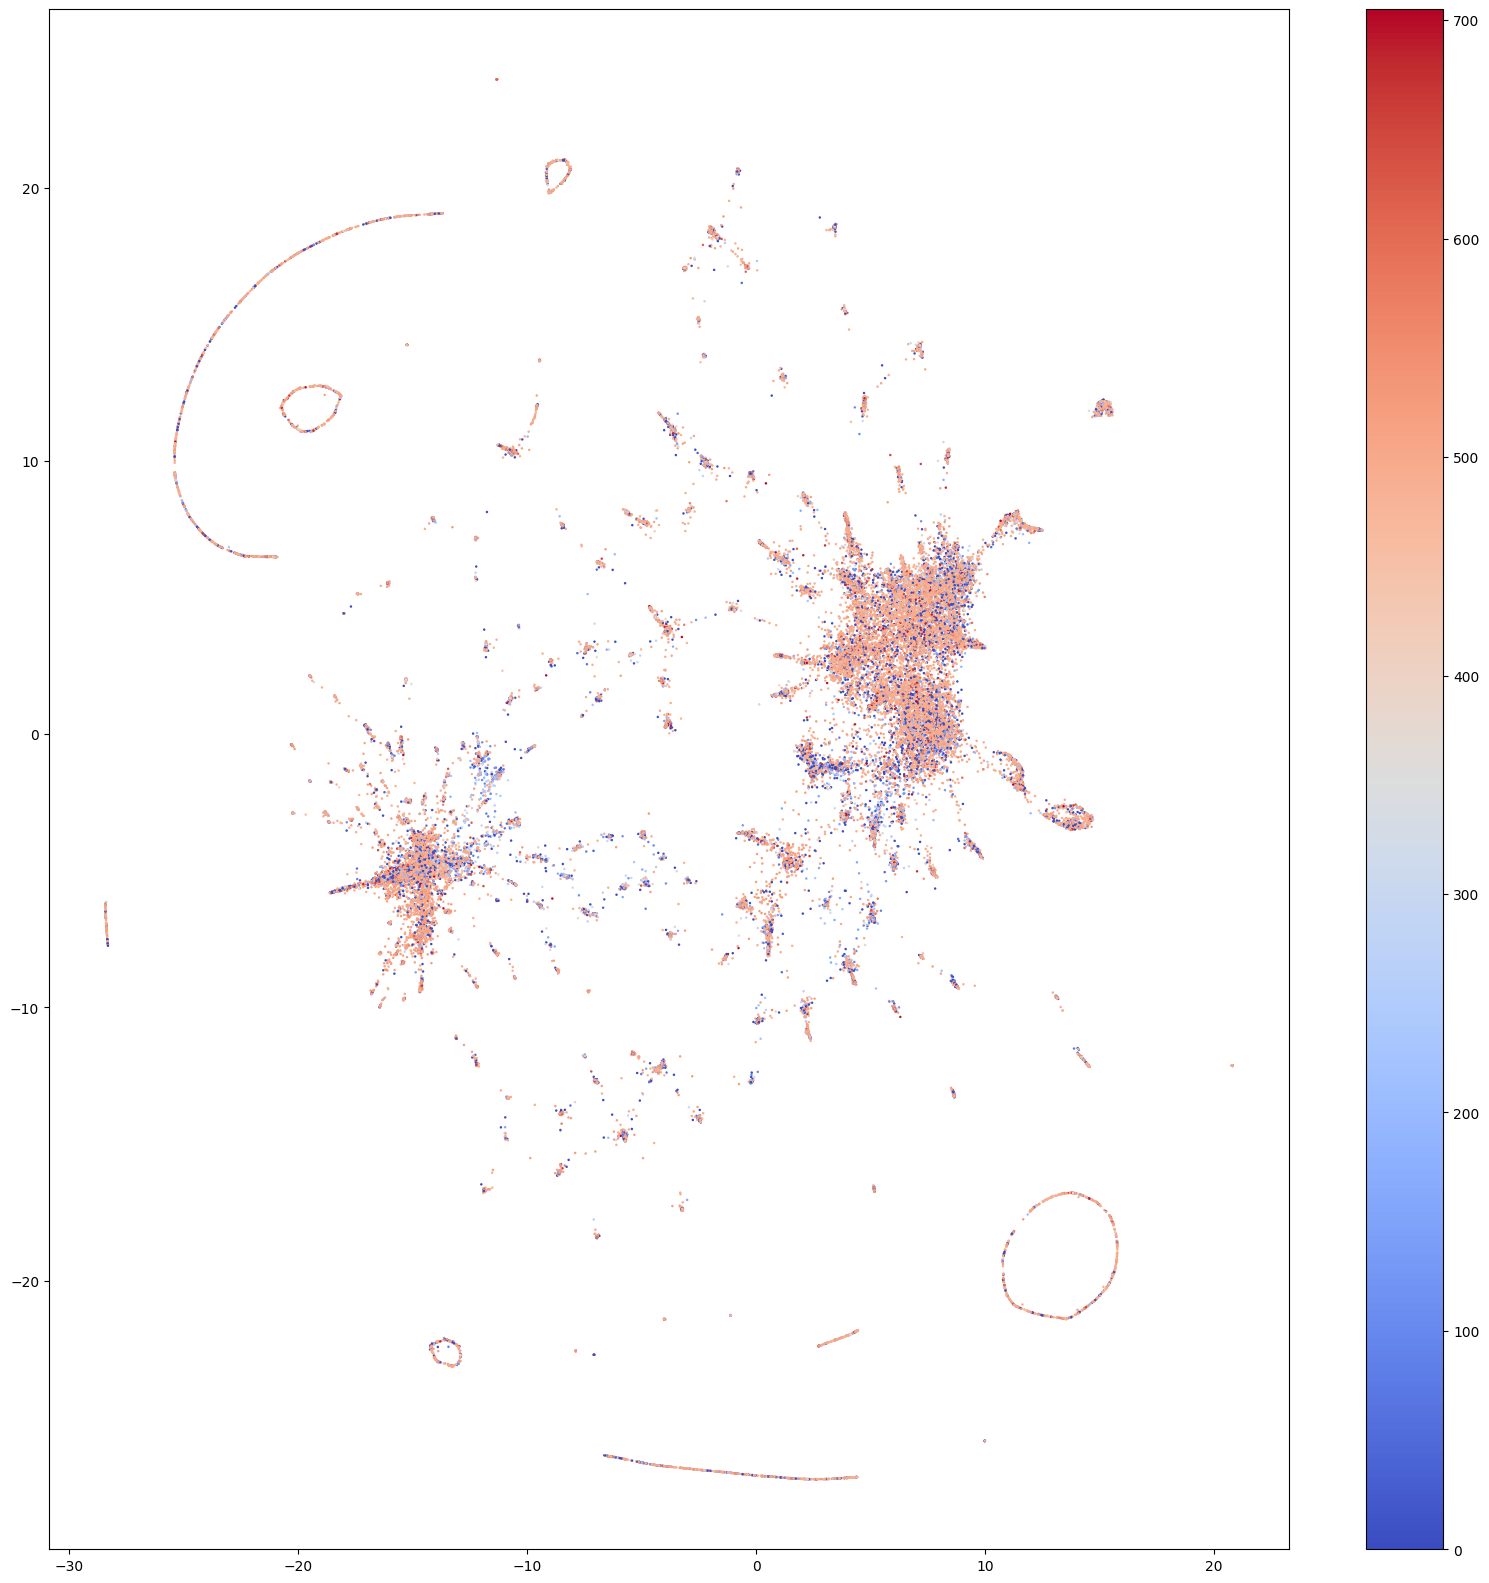

In [43]:
def label_function_zipcodes(labels, station_names): 
    for station_name in station_names:
    # Check if the station_name exists in address_coordinates dictionary
        if station_name in address_coordinates:
            zip = address_coordinates[station_name]
            if zip is not None:
                labels.append(zip)
            else: 
                labels.append("unknown")
        else:
            labels.append("unknown")
    return labels


# create_plot(model_200, label_function_zipcodes, 'model_200_min_1_zip')
# create_plot(model_1000, label_function_zipcodes, 'model_1000_min_1_zip')
# create_plot(model_5000, label_function_zipcodes, 'model_5000_min_10_zip')
create_plot(model_3000, label_function_zipcodes, 'model_3000_min_1_zip')

## COUNT PLOTS

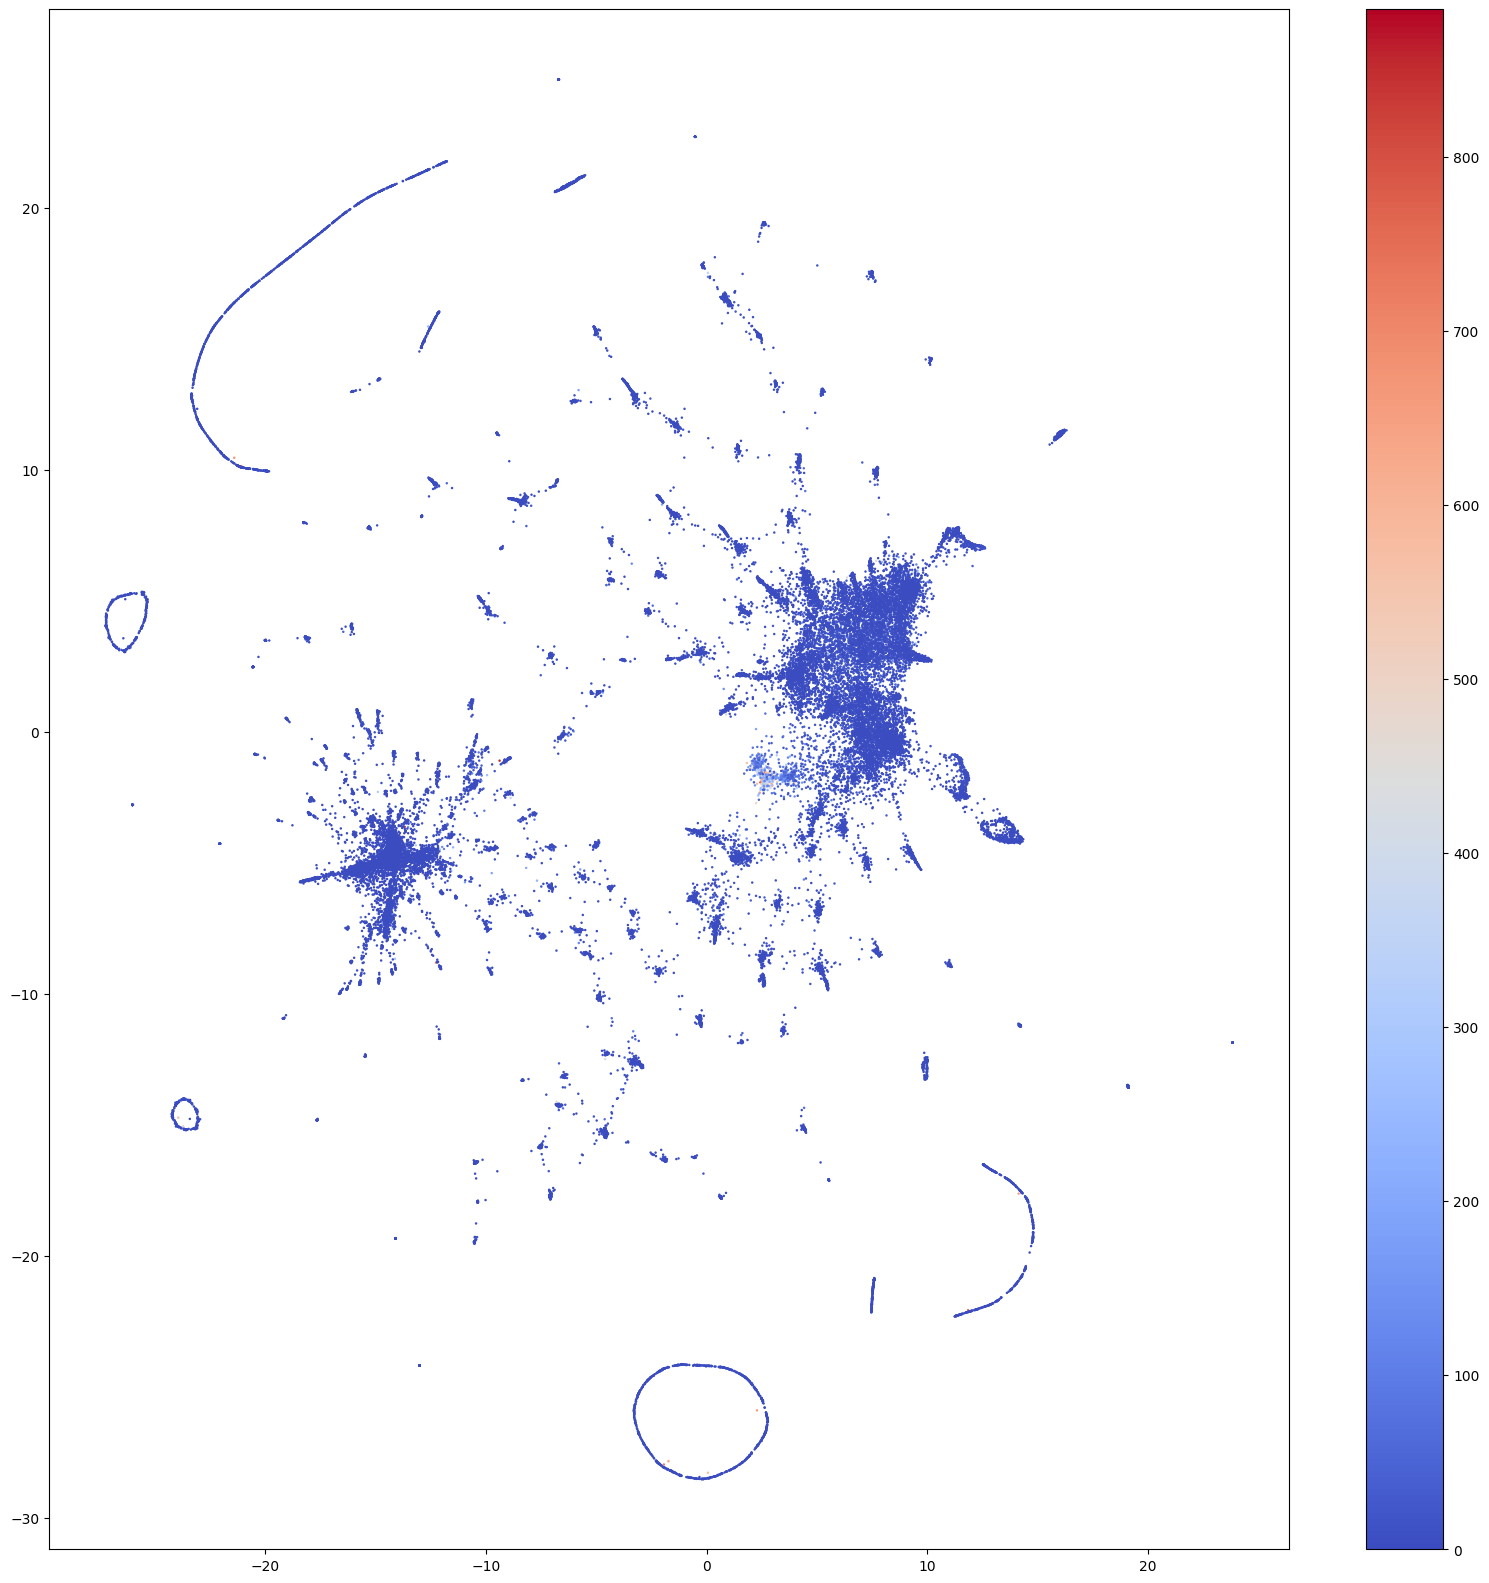

In [42]:
def label_function_address_count(labels, station_names): 
    for station_name in station_names:
            # Check if the station_name exists in address_coordinates dictionary
            if station_name in address_count_seq:
                labels.append(address_count_seq[station_name])
            else: 
                labels.append("")
    return labels

# create_plot(model_200, label_function_address_count, 'model_200_min_1_count')
# create_plot(model_1000, label_function_address_count, 'model_1000_min_1_count')
# create_plot(model_5000, label_function_address_count, 'model_5000_min_10_count')
create_plot(model_3000, label_function_address_count, 'model_3000_min_1_count')
